In [2]:
# Task 4: Insurance Cost Prediction using Linear Regression

#In this task, we aim to predict medical insurance costs (`charges`) based on features like age, BMI, smoking status,
#and other demographic information using a supervised learning model — Linear Regression.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
df = pd.read_csv('insurance.csv')  
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Dataset Overview

#We are using the `insurance.csv` dataset which includes:
#- `age`: Age of the individual
#- `sex`: Gender of the individual
#- `bmi`: Body Mass Index
#- `children`: Number of children
#- `smoker`: Whether the person smokes or not
#- `region`: Residential area
#- `charges`: Medical charges billed to the person


In [10]:
print(f"Shape of the Dataset: \n{df.shape}")
print(f"\nDataset Desciption: \n{df.describe()}")
print(f"\nNull Values in Dataset: \n{df.isnull().sum()}")
print(f"\nDuplicate Values in Dataset: \n{df.duplicated().sum()}")

Shape of the Dataset: 
(1338, 7)

Dataset Desciption: 
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Null Values in Dataset: 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Duplicate Values in Dataset: 
1


In [ ]:
# Removing any Duplicate Value

In [11]:
df.drop_duplicates(inplace=True)

In [ ]:
# Encoding categorical variables

In [12]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [ ]:
#The boxplot shows potential outliers in BMI, which we later remove using the IQR method.

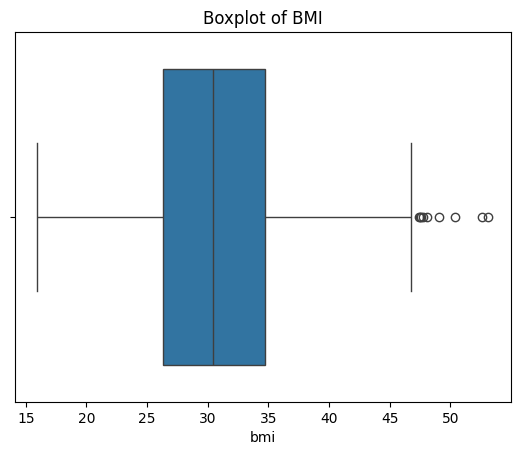

In [13]:
sns.boxplot(x=df['bmi'], )
plt.title("Boxplot of BMI")
plt.show()

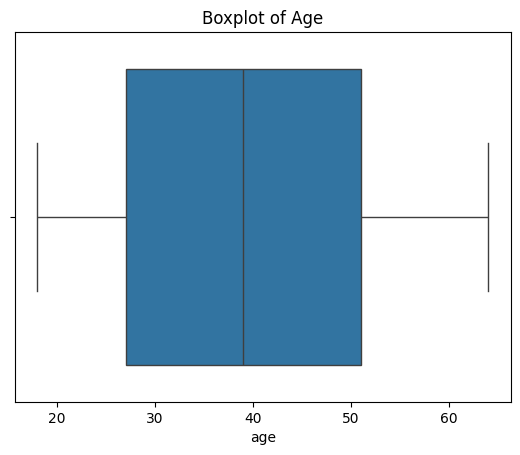

In [14]:
sns.boxplot(x=df['age'])
plt.title("Boxplot of Age")
plt.show()

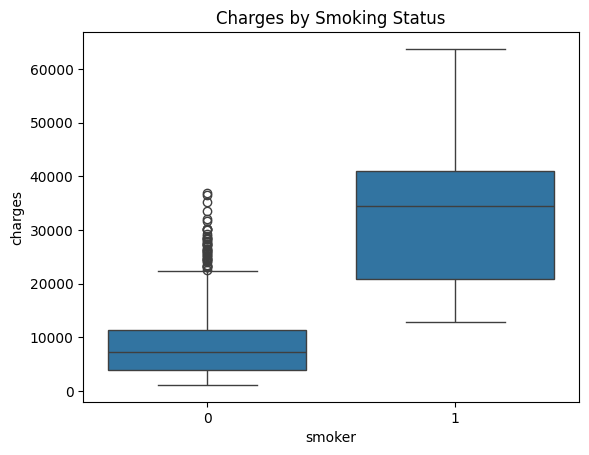

In [15]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges by Smoking Status")
plt.show()

In [27]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

df = remove_outliers_iqr(df, 'bmi')
df = remove_outliers_iqr(df, 'charges')
print(f"Dataset shape after removing outliers: {df.shape}")

Dataset shape after removing outliers: (1102, 9)


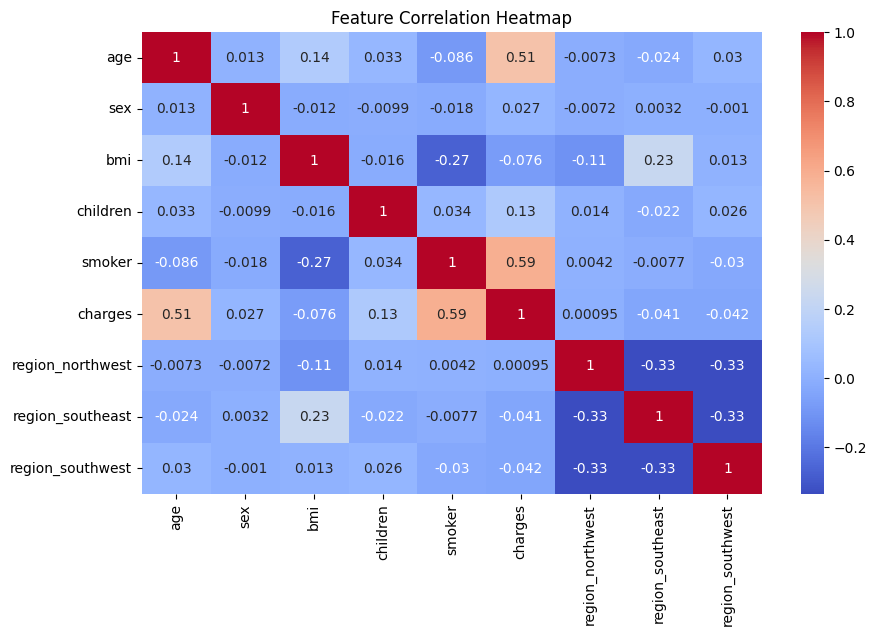

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

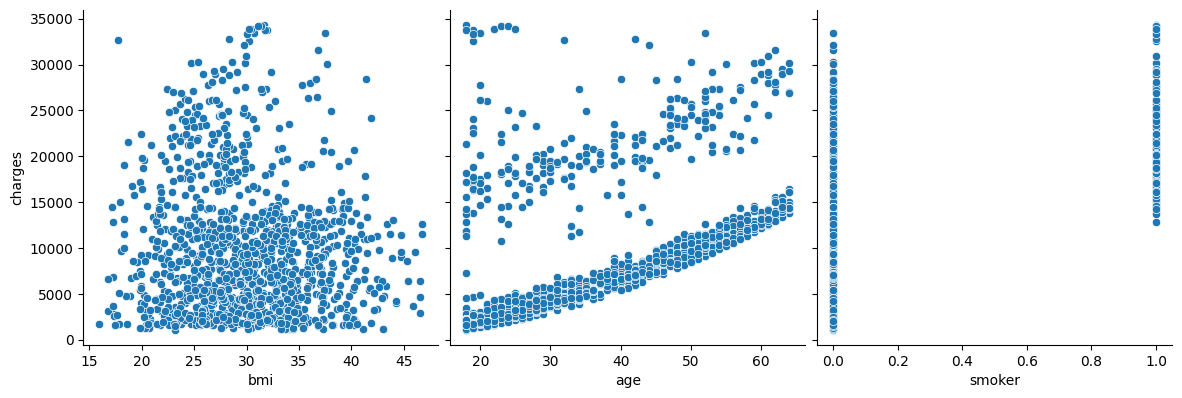

In [18]:
sns.pairplot(df, x_vars=['bmi', 'age', 'smoker'], y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

In [ ]:
# Feature Selection & Splitting data

In [28]:
X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Training Linear Regression model and Evaluating using  MAE, RMSE, and MAPE. 
#These metrics help understand how close the predicted charges are to the actual ones.

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
  
print("Linear Regression")
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Linear Regression
MAPE: 21.22%
MAE: 1380.8077896646719
RMSE: 2581.540978265275


In [ ]:
# Conclusion
# BMI, Age, and Smoking Status are key contributors to insurance charges.
# The Linear Regression model provides a reasonable approximation but may struggle with highly nonlinear patterns.